# SussexBudgetProductions Movie Data Analysis Report (277154)

This report will aim to use the IMDb database in order to make suggestions on what parameters the next film by SussexBudgetProductions should produce. For this, the report assumes that £1.5 million can be raised for the movie budget and so will aim to maximise grossing of the film. Profitability will also be considered as a smaller budget would be better but with this the revenue would still want to be as high as possible.

The IMDb database allows many different datapoints that can be analysed that can then be suggested in the conclusion for what film to produce. The columns with discrete data can be looked at first. With these there are many that rely on each other. Such as the directors will be reliant upon the genre of film being made as would the content rating. These would then also be dependent on what country the film is produced in, in turn dependent on the language. Therefore, these will have to be analysed in this order before finishing with the continuous data types to see if there is any correlation.

To begin with, I looked at the dataframe and realised there were many points that had no data in. If these were in the budget or gross columns, I discarded them as they would be no use for my measurement of profit that I added. I also noticed there were duplicates so as the data collector suggested I deleted these, keeping the first.


In [104]:
#preliminary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import statsmodels.api as sm
movies_df=pd.read_csv("movie_metadata.csv")

In [105]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [106]:
print(movies_df.duplicated("movie_title").any())##See if there are any duplicate entries and how many in total
sum(movies_df.duplicated("movie_title"))

True


126

In [107]:
movies_df.drop_duplicates("movie_title",keep="first",inplace=True,ignore_index=True)
movies_df.info()##Drop these duplicates but keep the first entry as recommended by data collector and count entries to ensure only these have been deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4898 non-null   object 
 1   director_name              4815 non-null   object 
 2   num_critic_for_reviews     4868 non-null   float64
 3   duration                   4902 non-null   float64
 4   director_facebook_likes    4815 non-null   float64
 5   actor_3_facebook_likes     4894 non-null   float64
 6   actor_2_name               4904 non-null   object 
 7   actor_1_facebook_likes     4910 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4917 non-null   object 
 10  actor_1_name               4910 non-null   object 
 11  movie_title                4917 non-null   object 
 12  num_voted_users            4917 non-null   int64  
 13  cast_total_facebook_likes  4917 non-null   int64

In [108]:
movies_df["profit"]=movies_df["gross"]-movies_df["budget"]##Add a new column into the dataframe that is the profit of the movies

In [109]:
movies_df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN


In [110]:
print(len(movies_df[movies_df["gross"].isnull()])+len(movies_df[movies_df["budget"].isnull()]))

1347


In [111]:
nan_indexes = movies_df[movies_df["gross"].isnull() | movies_df["budget"].isnull()].index
movies_df.drop(nan_indexes,inplace=True)
movies_df.reset_index(drop=True,inplace=True)
movies_df.info()##Drop all those that are blank for gross and budget as these are not useful for scoring how much return of investment was made on the parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3787 non-null   object 
 1   director_name              3789 non-null   object 
 2   num_critic_for_reviews     3788 non-null   float64
 3   duration                   3788 non-null   float64
 4   director_facebook_likes    3789 non-null   float64
 5   actor_3_facebook_likes     3779 non-null   float64
 6   actor_2_name               3784 non-null   object 
 7   actor_1_facebook_likes     3786 non-null   float64
 8   gross                      3789 non-null   float64
 9   genres                     3789 non-null   object 
 10  actor_1_name               3786 non-null   object 
 11  movie_title                3789 non-null   object 
 12  num_voted_users            3789 non-null   int64  
 13  cast_total_facebook_likes  3789 non-null   int64

In [112]:
movies_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,3788.000000,3788.000000,3789.000000,3779.000000,3786.000000,3.789000e+03,3.789000e+03,3789.000000,3783.000000,3789.000000,3.789000e+03,3789.000000,3784.000000,3789.000000,3715.000000,3789.000000,3.789000e+03
mean,160.677402,109.802798,786.665875,736.823763,7503.154517,5.020490e+07,1.014201e+05,11114.848509,1.385937,321.337820,4.151169e+07,2003.011085,1932.961681,6.461547,2.107567,8904.882291,8.693209e+06
std,122.770780,22.760215,3038.447982,1822.996034,15451.381326,6.872488e+07,1.506911e+05,18913.388976,2.065335,402.809142,1.075150e+08,9.994079,4452.752306,1.057753,0.354865,21188.159966,1.139491e+08
min,1.000000,34.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000,-4.199788e+09
25%,71.000000,95.000000,10.000000,182.000000,716.250000,6.543194e+06,1.665100e+04,1801.000000,0.000000,100.000000,9.500000e+06,1999.000000,358.000000,5.900000,1.850000,0.000000,-1.019724e+07
50%,131.000000,105.000000,58.000000,424.000000,1000.000000,2.720000e+07,4.961200e+04,3843.000000,1.000000,199.000000,2.400000e+07,2005.000000,658.500000,6.600000,2.350000,186.000000,7.517150e+05
75%,217.250000,120.000000,221.000000,683.000000,12000.000000,6.495596e+07,1.207860e+05,15835.000000,2.000000,385.000000,5.000000e+07,2010.000000,970.000000,7.200000,2.350000,10000.000000,2.428172e+07
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.300000,16.000000,349000.000000,5.235058e+08


Text(0.5, 0.98, 'Box Plot for profit of Films')

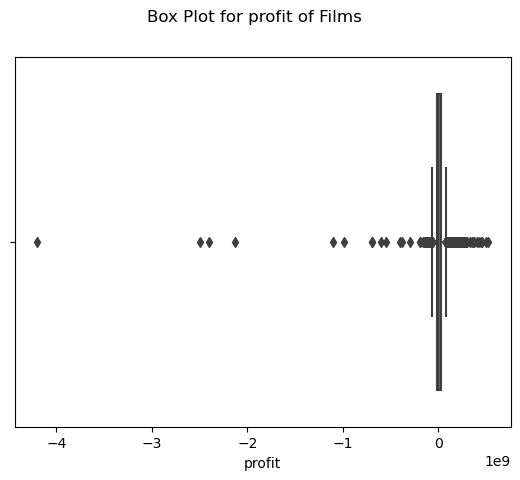

In [113]:
fig,axes=plt.subplots(nrows=1,ncols=1)

sns.boxplot(data=movies_df,x="profit")
fig.suptitle("Box Plot for profit of Films")##so many outliers with really low profits that data is not suitable for analysis

There are a lot of outliers that would make data analysis inaccurate so I removed these by taking the upper and lower bounds of 1.5 multiplied by the interquartile range.

In [114]:
def IQR_outliers(series):
    Q1 = series.quantile(q=0.25)
    Q3 = series.quantile(q=0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return lower_bound, upper_bound

In [115]:
lower_bound,upper_bound=IQR_outliers(movies_df["profit"])
print(lower_bound)
print(upper_bound)##Outliers of profits

-61915682.0
76000166.0


In [116]:
profit_movies_df=movies_df[movies_df.profit>lower_bound]
profit_movies_df=profit_movies_df[profit_movies_df.profit<upper_bound]##Remove the outliers in profit from the dataframe as defined as 1.5 times the IQR from the 1st and 3rd quartile 

Text(0.5, 0.98, 'Box Plot for Profit of Films')

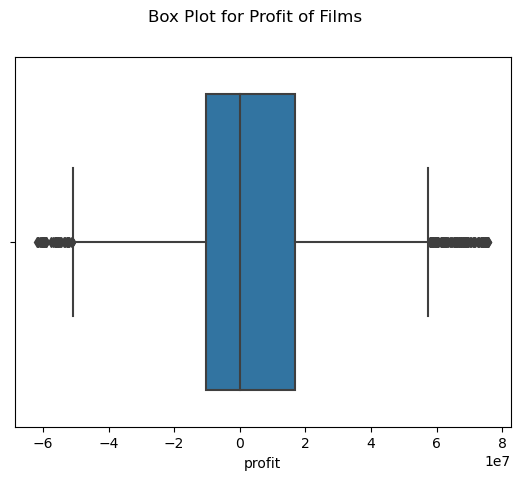

In [117]:
fig,axes=plt.subplots(nrows=1,ncols=1)

sns.boxplot(data=profit_movies_df,x="profit")
fig.suptitle("Box Plot for Profit of Films")

In [118]:
movies_df_budget=profit_movies_df[profit_movies_df.budget<1500000]##Create another data frame where the movies are under budget.

In [119]:
_,p_value = lilliefors(profit_movies_df["profit"],dist="norm")##p value is very low showing that the profit is not normally distributed
print(p_value)

0.0009999999999998899


In [120]:
_, p_value = ks_2samp(profit_movies_df[profit_movies_df.budget>1500000]["profit"],movies_df_budget["profit"])
print(p_value)##very small p value so can reject the null hypothesis that at different budgets the samples are similarly distributed
##Now on will just use those that are under budget

1.7390424936524157e-48


In [121]:
print(pd.unique(movies_df_budget.color))##Unique values in each column
print(len(pd.unique(movies_df_budget.director_name)))##Where too many to list, calculated the number of different directors and actors.
print(len(pd.unique(movies_df_budget.actor_2_name)))
print(len(pd.unique(movies_df_budget.actor_1_name)))
print(len(pd.unique(movies_df_budget.actor_3_name)))
print(pd.unique(movies_df_budget.language))
print(pd.unique(movies_df_budget.country))
print(pd.unique(movies_df_budget.content_rating))

['Color' ' Black and White']
231
240
232
239
['English' 'French' 'Hindi' 'Arabic' 'Spanish' 'Danish' 'Italian'
 'Indonesian' 'Romanian' 'Persian' 'Norwegian' 'Dari' 'Hebrew' nan
 'Japanese']
['USA' 'UK' 'France' 'India' 'Argentina' 'Denmark' 'Mexico' 'Italy'
 'Canada' 'Indonesia' 'New Zealand' 'Germany' 'Romania' 'Iran' 'Norway'
 'Afghanistan' 'Israel' 'Australia' 'Ireland' 'Japan' 'Philippines']
['R' nan 'Unrated' 'PG-13' 'PG' 'Approved' 'Not Rated' 'X' 'NC-17' 'G'
 'Passed']


I compared at the 5% significance level if colour films were more profitable than black and white. However, as colour films are generally newer, I removed films older than 1990. None of these were normally distributed so I had to use bootstrapping. The result was not within a significant level so I could not say either if the movie should be produced in colour or black and white.

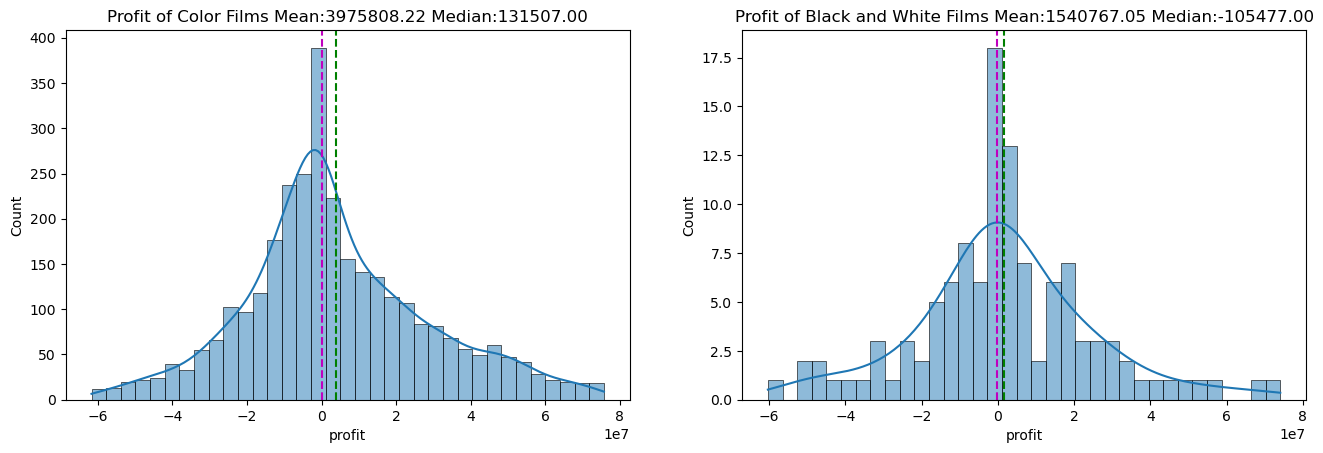

In [122]:
color_df=profit_movies_df[profit_movies_df.color=="Color"]
black_df=profit_movies_df[profit_movies_df.color==" Black and White"]
color_df=color_df.dropna()
black_df=black_df.dropna()

mean_color= color_df["profit"].mean()
median_color = color_df["profit"].median()
mean_black= black_df["profit"].mean()
median_black = black_df["profit"].median()

fig, axes = plt.subplots(nrows = 1,ncols = 2)
sns.histplot(data=color_df,ax=axes[0],x="profit",kde=True,bins=35)
sns.histplot(data=black_df,ax=axes[1],x="profit",kde=True,bins=35)
axes[0].set_title(f"Profit of Color Films Mean:{mean_color:.2f} Median:{median_color:.2f}")
axes[1].set_title(f"Profit of Black and White Films Mean:{mean_black:.2f} Median:{median_black:.2f}")
fig.set_figwidth(fig.get_figwidth()*2.5)

axes[0].axvline(mean_color,ls="--",color="g", label="mean")
axes[0].axvline(median_color,ls="--",color="m", label="median")
axes[1].axvline(mean_black,ls="--",color="g", label="mean")
axes[1].axvline(median_black,ls="--",color="m", label="median")

In [123]:
print(black_df.title_year.mean())##Mean year of each colour and black and white movies
print(color_df.title_year.mean())

1994.421052631579
2003.327779557834


In [124]:
modern_black_df=black_df[black_df.title_year>1990]
modern_black_df.title_year.mean()

2002.6666666666667

In [125]:
modern_color_df=color_df[color_df.title_year>1990]
modern_color_df.title_year.mean()##means are much closer and removes the low grossing films from earlier years that still were successful

2005.0989583333333

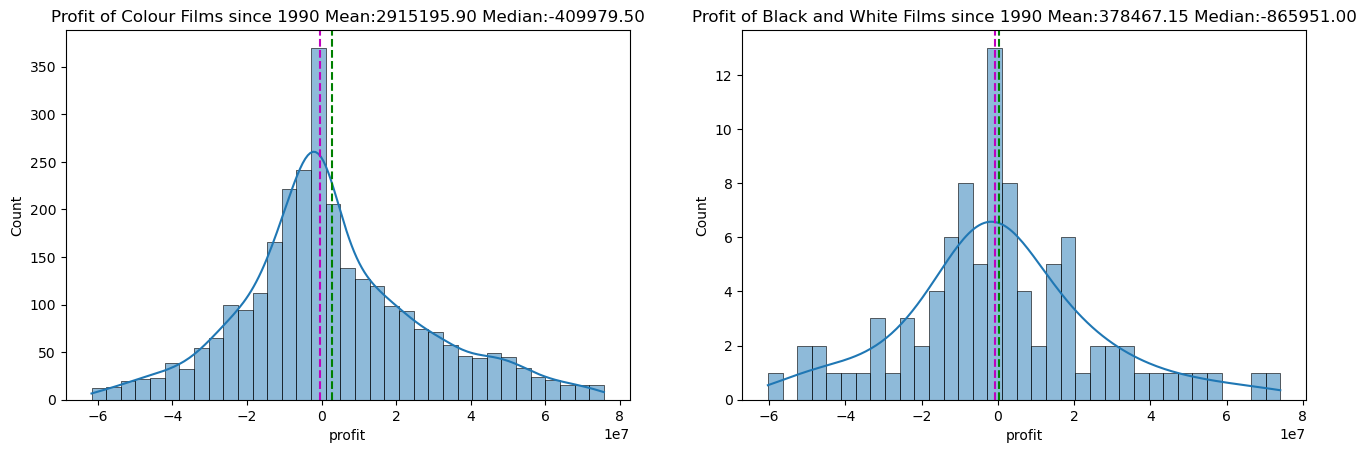

In [126]:
fig, axes = plt.subplots(nrows = 1,ncols = 2)
sns.histplot(data=modern_color_df,ax=axes[0],x="profit",kde=True,bins=35)
sns.histplot(data=modern_black_df,ax=axes[1],x="profit",kde=True,bins=35)


mean_color= modern_color_df["profit"].mean()
median_color = modern_color_df["profit"].median()
mean_black= modern_black_df["profit"].mean()
median_black = modern_black_df["profit"].median()

axes[0].axvline(mean_color,ls="--",color="g", label="mean")
axes[0].axvline(median_color,ls="--",color="m", label="median")
axes[1].axvline(mean_black,ls="--",color="g", label="mean")
axes[1].axvline(median_black,ls="--",color="m", label="median")

axes[0].set_title(f"Profit of Colour Films since 1990 Mean:{mean_color:.2f} Median:{median_color:.2f}")
axes[1].set_title(f"Profit of Black and White Films since 1990 Mean:{mean_black:.2f} Median:{median_black:.2f}")

fig.set_figwidth(fig.get_figwidth()*2.5)##Mean and median looks much higher for colour films but will have to do bootstrapping in order to get a normal distribution to prove that colour films mean is higher

In [127]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=10000):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if np.abs(bs_t_stat) >= np.abs(t_stat):
            count += 1 

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)

In [128]:
def bootstrap_mean(data1,num_bootstrap=10000):
    alpha=0.05
    n=len(data1)
    data = np.array([np.mean(data1[np.random.randint(0,n,size=n)]) for _ in range(num_bootstrap)])
    m = np.mean(data)
    se = np.std(data,ddof=1)
    t_score = t(n-1).ppf(1.0 - alpha/2.0)
    lower_bound = m - t_score*se
    upper_bound = m + t_score*se    
    print(f"{100*(1 - alpha):.1f}% confidence interval for the mean is ({lower_bound} , {upper_bound})")

In [129]:
bs_color_df=modern_color_df.reset_index(drop=True)
bs_black_df=modern_black_df.reset_index(drop=True)##Reset indexes in order for the bootstrapping to work

In [130]:
print("For colour:")
bootstrap_mean(bs_color_df["profit"])
print("For black and white:")
bootstrap_mean(bs_black_df["profit"])##Too small a sample size to give an effective bootstrapping on the black and white films

For colour:
95.0% confidence interval for the mean is (2007854.0028330747 , 3827819.967632967)
For black and white:
95.0% confidence interval for the mean is (-4795112.6807534145 , 5563470.221209328)


\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_b - \mu_c = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_b - \mu_c \lt 0
\end{align*}


In [131]:
dbar, _, p_value = bootstrap_diff_means(bs_color_df["profit"],bs_black_df["profit"])
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
if p_value>0.05:
    ("Therefore not enough evidence to reject the null hypothesis at the 5% significance level")

There is a probability of 0.3498 that the observed difference of mean being different to 2536728.7533 given the underlying difference of means is 0


I could now look at the language the film should be produced in and then what country would be suitable for this language as many other categories would rely on this. English was most profitable so I compared this to other films and found that the mean was significantly higher at the 5% significance level with bootstrapping.  I could then make a dataframe with only English films within budget and look at what country to produce these in. This showed the most profitable being Ireland, USA and UK, however, there was only one film in Ireland so this would not be useful. From those under budget, at the 5% significance level, I could only find USA significatly more profitable than Canada. Therefore, due to the small sample sizes I looked at all films produced in these countries and the top 2 from these were the USA and UK and by bootstrapping the means the USA was significantly more profitable. Therefore, I can suggest for the film to be produced in the USA.

In [132]:
g=movies_df_budget.groupby(["language"])["profit"].mean()
high=g.sort_values(ascending=False)
high.head(5)##Sort the movies under budget into the different languages

language
English       3.851290e+06
Persian       2.669225e+06
Italian       2.642129e+06
Hindi         1.421246e+06
Indonesian    1.244672e+06
Name: profit, dtype: float64

In [133]:
english_df=movies_df_budget[movies_df_budget.language=="English"].reset_index(drop=True)
ne_df=movies_df_budget[~movies_df_budget["language"].str.contains("English", na=False)].reset_index(drop=True)
nan_indexes = ne_df[ne_df["language"].isnull()].index
ne_df.drop(nan_indexes,inplace=True)
ne_df=ne_df.reset_index(drop=True)##Make a non english dataframe to compare to english

In [134]:
_, p_value = lilliefors(english_df["profit"],dist="norm")
print(f"The p value for profit for English films being normally distributed is:{p_value}")
_, p_value = lilliefors(ne_df["profit"],dist="norm")
print(f"The p value for profit for Non-English films being normally distributed is:{p_value}")

The p value for profit for English films being normally distributed is:0.0009999999999998899
The p value for profit for Non-English films being normally distributed is:0.09914695154525963


In [135]:
dbar, _, p_value = bootstrap_diff_means(ne_df["profit"],english_df["profit"])
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
if p_value<0.5:
    print("Therefore there is enough evidence to reject the null hypothesis that the means for profit for English and Non-English are the same")
else:
    print("There is not enough evidence to reject the null hypothesis that the means for profit are different for English and Non-English films at the 5% significance level")

There is a probability of 0.0003 that the observed difference of mean being different to -3018593.9924 given the underlying difference of means is 0
Therefore there is enough evidence to reject the null hypothesis that the means for profit for English and Non-English are the same


In [136]:
country=english_df.groupby(["country"])["profit"].mean()
highc=country.sort_values(ascending=False)
highc##Sort english dataframe into countries

country
Ireland        9.257933e+06
USA            4.308496e+06
UK             1.638170e+06
Canada         1.841888e+05
France         7.219467e+04
Philippines    6.307100e+04
Australia     -3.771500e+04
India         -2.831080e+05
New Zealand   -7.122390e+05
Denmark       -8.997600e+05
Germany       -9.992790e+05
Name: profit, dtype: float64

In [137]:
ireland_df=english_df[english_df.country=="Ireland"].reset_index(drop=True)
USA_df=english_df[english_df.country=="USA"].reset_index(drop=True)
UK_df=english_df[english_df.country=="UK"].reset_index(drop=True)
canada_df=english_df[english_df.country=="Canada"].reset_index(drop=True)##make dataframes for countries of each of the top 4 countries

In [138]:
ireland_df##Not enough data points in Irish films in order to do data analysis

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,John Carney,232.0,85.0,109.0,18.0,Markéta Irglová,200.0,9437933.0,Drama|Music|Romance,...,English,Ireland,R,180000.0,2007.0,96.0,7.9,1.85,26000,9257933.0


In [139]:
dbar,_,p_value=bootstrap_diff_means(canada_df.profit,USA_df.profit)##Can only prove USA is more profitable than Canada
print(p_value)
print("Therefore enough evidence to reject the null hypothesis that the mean for profit for USA and Canada films are the same at the 5% significance level")

0.0036996300369963003
Therefore enough evidence to reject the null hypothesis that the mean for profit for USA and Canada films are the same at the 5% significance level


In [140]:
all_country=movies_df.groupby(["country"])["profit"].mean()
topc=all_country.sort_values(ascending=False)
topc.head(10)##Go back to all films above budget to get more data points

country
Taiwan           4.934068e+07
South Africa     3.458008e+07
New Zealand      2.478414e+07
USA              1.716164e+07
Peru             1.236258e+07
Argentina        5.597603e+06
Official site    5.218921e+06
Australia        4.191649e+06
UK               4.164174e+06
Colombia         3.517198e+06
Name: profit, dtype: float64

\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_{UK} - \mu_{US} = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_{UK} - \mu_{US} \lt 0
\end{align*}


In [141]:
USA_df=movies_df[movies_df["country"]=="USA"].reset_index(drop=True)
UK_df=movies_df[movies_df["country"]=="UK"].reset_index(drop=True)
##Make new dataframes for USA and UK that now have plenty of datapoints to compare to see if significant difference

Text(0.5, 1.0, 'USA vs UK')

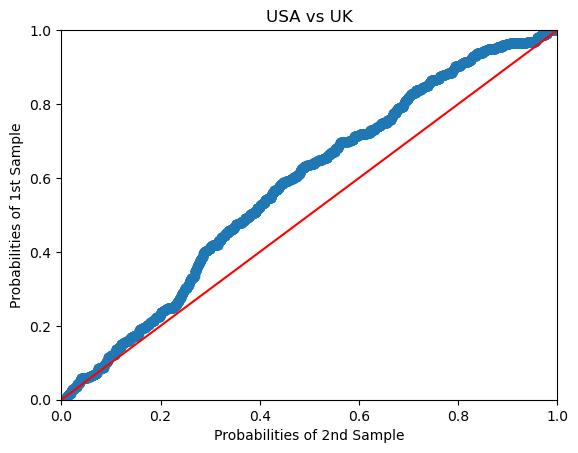

In [142]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

pp_1 = sm.ProbPlot(USA_df.profit)
pp_2 = sm.ProbPlot(UK_df.profit)
pp_1.ppplot(line="45",ax=ax,other=pp_2)

ax.set_title("USA vs UK")##Lot of samples for the US and is far higher than UK so looks like will be significantly different

In [143]:
dbar,_,p_value=bootstrap_diff_means(USA_df.profit,UK_df.profit)
print(f"There is a probability of {p_value} that the obsereved difference in means would be different between movies in the USA and the UK given the underlying difference in means is 0")
if p_value<0.05:
    print("Therefore there is enough evidence to reject the null hypothesis that the mean of the USA and the UK is the same at the 5% significance level")

There is a probability of 9.999000099990002e-05 that the obsereved difference in means would be different between movies in the USA and the UK given the underlying difference in means is 0
Therefore there is enough evidence to reject the null hypothesis that the mean of the USA and the UK is the same at the 5% significance level


I could now adapt my dataframe to just be films produced in the USA and could look at what genre the film should be produced in. I looked at all the possible genres and added a column for each on the end with a Boolean value for the film in that genre as most films were multiple genres. I displayed all mean profits for each genre. I then displayed the top 6 genres in histograms. I then compared the means of the horror’s profit to the other 5. This showed significant difference in mean of profit except for thriller and mystery which makes sense as these genres would have a lot of overlap. Thus, I can say that the movie should include at least one of these genres.

In [144]:
USA_budget=english_df[english_df.country=="USA"].reset_index(drop=True)
USA_budget##Remake the dataframe that is made in USA, in English and is under budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,Martin Scorsese,112.0,112.0,17000.0,354.0,David Carradine,22000.0,32645.0,Crime|Drama|Romance|Thriller,...,English,USA,R,500000.0,1973.0,926.0,7.4,1.85,0,-467355.0
1,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000,31193053.0
2,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,20378000.0
3,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
4,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,30775468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Color,Daryl Wein,22.0,88.0,38.0,211.0,Heather Burns,331.0,76382.0,Romance,...,English,USA,NaN,15000.0,2009.0,212.0,6.2,2.35,324,61382.0
185,Color,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,...,English,USA,NC-17,10000.0,1972.0,143.0,6.1,1.37,0,170483.0
186,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0
187,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0


In [145]:
pd.unique(USA_budget["genres"])##Movies have a number of genres for each film so will need to sort these

array(['Crime|Drama|Romance|Thriller', 'Horror|Mystery|Thriller',
       'Fantasy|Horror', 'Horror|Thriller', 'Drama',
       'Crime|Drama|Horror|Thriller', 'Drama|Horror|Sci-Fi',
       'Comedy|Family|Musical|Romance|Short', 'Drama|Horror',
       'Action|Biography|Drama|Sport', 'Comedy|Drama|Romance',
       'Comedy|Drama', 'Comedy', 'Drama|Music', 'Comedy|Crime|Mystery',
       'Drama|Sport', 'Crime|Drama|Thriller', 'Comedy|Music',
       'Comedy|Documentary', 'Action|Drama|Horror|Thriller', 'Horror',
       'Horror|Mystery|Sci-Fi|Thriller', 'Drama|Horror|Mystery|Thriller',
       'Adventure|Comedy|Drama', 'Comedy|Drama|Music',
       'Biography|Comedy|Drama|Romance', 'Crime|Drama',
       'Documentary|Music', 'Documentary', 'Comedy|Drama|Romance|Sport',
       'Crime|Drama|Mystery', 'Comedy|Sci-Fi', 'Comedy|Romance',
       'Comedy|Drama|Fantasy|Romance', 'Crime|Documentary|War',
       'Action|Drama', 'Comedy|Crime|Thriller', 'Comedy|Crime',
       'Action|Comedy|Fantasy|Sci-Fi', 

In [146]:
genre_df=USA_budget

In [147]:
genres=[e for e in USA_budget.genres]
profits=[e for e in USA_budget.profit]##List of genres and profits so can look up a genre and get corresponding profit

In [148]:
def genre_means(genre):
    total=0
    count=0
    for i in genres:
        if genre in i:
            total+=profits[count]
        count+=1
    return (total/count)##function to get the mean profit from each genre

def genre_profits(genre):
    total=[]
    count=0
    for i in genres:
        if genre in i:
            total.append(profits[count])
        count+=1
    return total##produces a list for the profits for each film in that genre

In [149]:
genre_list=["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Documentary","Fantasy","History","Horror","Music","Musical","Mystery","Romance","Sci-Fi","Short","Sport","Thriller","War","Western"]
##genre list is all possible genres
for g in genre_list:
    print(f"The mean profit for {g} is {genre_means(g)}")##Shows the top genres are horror, thriller and drama

The mean profit for Action is 90784.25396825396
The mean profit for Adventure is 460374.0582010582
The mean profit for Animation is 24984.402116402118
The mean profit for Biography is 333798.5767195767
The mean profit for Comedy is 915691.9629629629
The mean profit for Crime is 234217.4126984127
The mean profit for Drama is 1658551.291005291
The mean profit for Documentary is 218440.92592592593
The mean profit for Fantasy is 113264.94708994709
The mean profit for History is 67276.11111111111
The mean profit for Horror is 2098706.8571428573
The mean profit for Music is 174771.61375661375
The mean profit for Musical is 33944.21164021164
The mean profit for Mystery is 949193.2328042329
The mean profit for Romance is 882435.1851851852
The mean profit for Sci-Fi is 210688.78306878306
The mean profit for Short is 1585.4920634920634
The mean profit for Sport is 158358.32804232804
The mean profit for Thriller is 1606305.1216931217
The mean profit for War is -1032.111111111111
The mean profit f

In [150]:
def genre_bool(genre):
    bool_list=[]
    for g in genres:
        if genre in g:
            bool_list.append("True")
        else:
            bool_list.append("False")
    return bool_list##function to produce list of true and falses for each genre to be added to dataframe

In [151]:
for g in genre_list:
    genre_df[g]=genre_bool(g)##make list for each genre so dataframes can be made with each genre only

In [152]:
horror_df=genre_df[genre_df.Horror=="True"].reset_index(drop=True)
drama_df=genre_df[genre_df.Drama=="True"].reset_index(drop=True)
thriller_df=genre_df[genre_df.Thriller=="True"].reset_index(drop=True)
mystery_df=genre_df[genre_df.Mystery=="True"].reset_index(drop=True)
comedy_df=genre_df[genre_df.Comedy=="True"].reset_index(drop=True)
romance_df=genre_df[genre_df.Romance=="True"].reset_index(drop=True)##New dfs for each genre with mean profit over 800,000

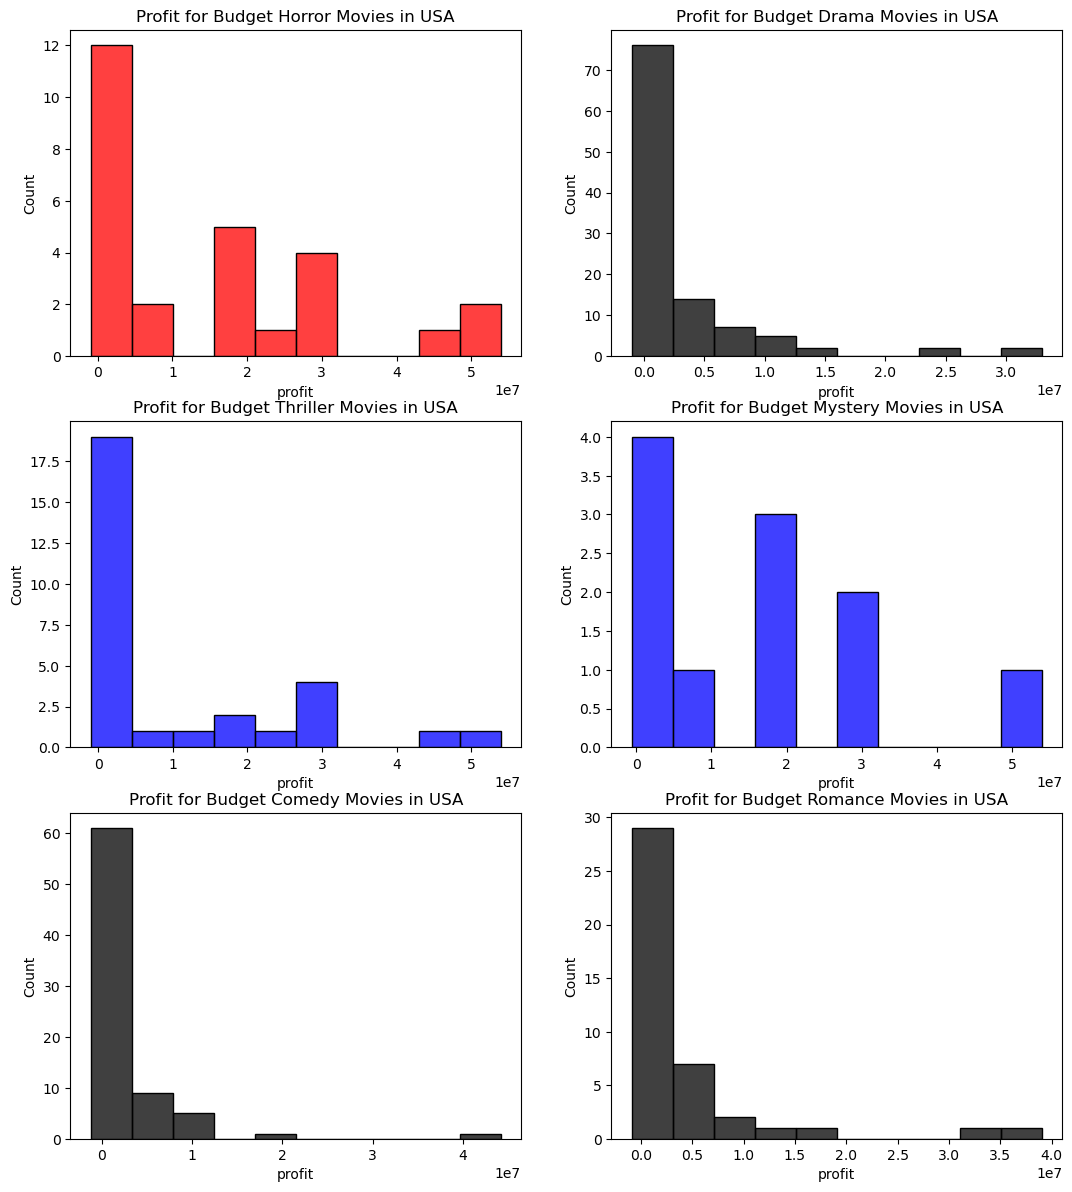

In [153]:
fig,axes = plt.subplots(nrows=3,ncols=2)

sns.histplot(data=horror_df,ax=axes[0,0],x="profit",bins=10,color="r")
sns.histplot(data=drama_df,ax=axes[0,1],x="profit",bins=10,color="k")
sns.histplot(data=thriller_df,ax=axes[1,0],x="profit",bins=10,color="b")
sns.histplot(data=mystery_df,ax=axes[1,1],x="profit",bins=10,color="b")
sns.histplot(data=comedy_df,ax=axes[2,0],x="profit",bins=10,color="k")
sns.histplot(data=romance_df,ax=axes[2,1],x="profit",bins=10,color="k")

axes[0,0].set_title("Profit for Budget Horror Movies in USA")
axes[0,1].set_title("Profit for Budget Drama Movies in USA")
axes[1,0].set_title("Profit for Budget Thriller Movies in USA")
axes[1,1].set_title("Profit for Budget Mystery Movies in USA")
axes[2,0].set_title("Profit for Budget Comedy Movies in USA")
axes[2,1].set_title("Profit for Budget Romance Movies in USA")

fig.set_figheight(fig.get_figheight()*3)
fig.set_figwidth(fig.get_figwidth()*2)##Histplots for each of the genres

In [154]:
dbar,_,p_value=bootstrap_diff_means(horror_df.profit,drama_df.profit)
print(f"The chance of horror and drama having a difference of means of {dbar:.2f} given the underlying difference is 0 is {p_value:.4f}")
dbar,_,p_value=bootstrap_diff_means(horror_df.profit,thriller_df.profit)
print(f"The chance of horror and thriller having a difference of means of {dbar:.2f} given the underlying difference is 0 is {p_value:.4f}")
dbar,_,p_value=bootstrap_diff_means(horror_df.profit,mystery_df.profit)
print(f"The chance of horror and mystery having a difference of means of {dbar:.2f} given the underlying difference is 0 is {p_value:.4f}")
dbar,_,p_value=bootstrap_diff_means(horror_df.profit,comedy_df.profit)
print(f"The chance of horror and comedy having a difference of means of {dbar:.2f} given the underlying difference is 0 is {p_value:.4f}")
dbar,_,p_value=bootstrap_diff_means(horror_df.profit,romance_df.profit)
print(f"The chance of horror and romance having a difference of means of {dbar:.2f} given the underlying difference is 0 is {p_value:.4f}")

The chance of horror and drama having a difference of means of 11788483.24 given the underlying difference is 0 is 0.0054
The chance of horror and thriller having a difference of means of 4571225.73 given the underlying difference is 0 is 0.3050
The chance of horror and mystery having a difference of means of -1617917.55 given the underlying difference is 0 is 0.7953
The chance of horror and comedy having a difference of means of 12443340.45 given the underlying difference is 0 is 0.0043
The chance of horror and romance having a difference of means of 10719989.67 given the underlying difference is 0 is 0.0080


I then compared the content ratings for all these genres. However, as I did this, I found that almost all were R rated so any data analysis on this would not give much information. 

In [155]:
print(pd.unique(horror_df.content_rating))
print(pd.unique(thriller_df.content_rating))
print(pd.unique(mystery_df.content_rating))##Looking at unique ratings for each film to see how to wrangle

['R' 'PG-13' 'PG' 'Not Rated' 'Unrated' nan 'Approved' 'NC-17']
['R' 'PG-13' 'Not Rated']
['R' 'PG-13']


In [156]:
htm_df = pd.concat([horror_df, thriller_df, mystery_df], ignore_index=True, sort=False)
htm_df##make a data frame with just USA movies in budget in genres of horror thriller and mystery

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,False,False,True,False,False,False,False,True,False,False
1,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,False,False,False,False,False,False,False,False,False,False
2,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,False,False,False,False,False,False,False,True,False,False
3,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,False,False,False,False,False,False,False,True,False,False
4,Color,Renny Harlin,68.0,102.0,212.0,195.0,Lane Smith,10000.0,354704.0,Crime|Drama|Horror|Thriller,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Color,Jeff Wadlow,137.0,90.0,65.0,683.0,Gary Cole,1000.0,10042266.0,Drama|Horror|Mystery|Thriller,...,False,False,True,False,False,False,False,True,False,False
64,Color,Richard Dutcher,12.0,119.0,13.0,25.0,Frank Gerrish,957.0,798341.0,Crime|Drama|Mystery,...,False,False,True,False,False,False,False,False,False,False
65,Color,Gene Teigland,NaN,103.0,0.0,20.0,Matthew Feeney,23.0,23616.0,Mystery|Thriller,...,False,False,True,False,False,False,False,True,False,False
66,Color,Greg Harrison,43.0,78.0,7.0,142.0,Anne Archer,308.0,191309.0,Drama|Mystery|Thriller,...,False,False,True,False,False,False,False,True,False,False


In [157]:
sum(htm_df.duplicated("movie_title"))##How many duplicates to drop

22

In [158]:
htm_df.drop_duplicates("movie_title",keep="first",inplace=True,ignore_index=True)
htm_df.info()##drop the duplicates and make sure correct has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      46 non-null     object 
 1   director_name              46 non-null     object 
 2   num_critic_for_reviews     45 non-null     float64
 3   duration                   46 non-null     float64
 4   director_facebook_likes    46 non-null     float64
 5   actor_3_facebook_likes     46 non-null     float64
 6   actor_2_name               46 non-null     object 
 7   actor_1_facebook_likes     46 non-null     float64
 8   gross                      46 non-null     float64
 9   genres                     46 non-null     object 
 10  actor_1_name               46 non-null     object 
 11  movie_title                46 non-null     object 
 12  num_voted_users            46 non-null     int64  
 13  cast_total_facebook_likes  46 non-null     int64  
 

In [159]:
ratings=htm_df.groupby(["content_rating"])["profit"].mean()
topr=ratings.sort_values(ascending=False)
topr

content_rating
R            1.212964e+07
PG           8.285268e+06
Approved     4.790000e+06
PG-13        2.170496e+06
NC-17        1.704830e+05
Unrated     -4.770000e+05
Not Rated   -5.430903e+05
Name: profit, dtype: float64

In [160]:
print("The number of budget movies in the US in target genre that are rated R is: ")
print(len(htm_df[htm_df.content_rating=="R"]))
print("PG: ")
print(len(htm_df[htm_df.content_rating=="PG"]))
print("Approved: ")
print(len(htm_df[htm_df.content_rating=="Approved"]))
print("PG-13: ")
print(len(htm_df[htm_df.content_rating=="PG-13"]))##Almost all the movies in this are rated R so not useful to do data analysis

The number of budget movies in the US in target genre that are rated R is: 
33
PG: 
2
Approved: 
1
PG-13: 
4


I then looked at most profitable directors, but this would not suggest much in data analysis as small sample sizes. Therefore, I looked at my suggested dataframe and although second films were more profitable, it was not significant. Therefore, I compared all films and showed that the third film was significantly more profitable. Therefore, looking at directors in my dataframe there is only one director that fits this (Greg Harrison) although this would be tentative as budget movies were shown to be differently distributed earlier.

In [161]:
dir_df=htm_df.groupby(["director_name"])["profit"].mean()
topd=dir_df.sort_values(ascending=False)
topd.head(10)##Lot of directors that have few films so susceptible to outlier

director_name
James Wan             53953403.0
William Brent Bell    52245055.0
John Carpenter        33539000.0
Alfred Hitchcock      31193053.0
Tobe Hooper           30775468.0
Levan Gabriadze       30537320.0
Chris Kentis          30000882.0
Travis Cluff          22657819.0
Steve Miner           17850000.0
Jay Chandrasekhar     17288314.0
Name: profit, dtype: float64

In [162]:
all_dir_df=movies_df_budget.groupby(["director_name"])["profit"].mean()
topd=all_dir_df.sort_values(ascending=False)
topd.head(10)

director_name
James Wan             53953403.0
William Brent Bell    52245055.0
Jared Hess            44140956.0
Joe Camp              39052600.0
John Carpenter        33539000.0
Alfred Hitchcock      31193053.0
Tobe Hooper           30775468.0
Levan Gabriadze       30537320.0
Chris Kentis          30000882.0
Billy Bob Thornton    23585416.0
Name: profit, dtype: float64

In [163]:
year_df=movies_df_budget.sort_values("title_year",ascending=True).reset_index(drop=True)
directors=[]
profits=[]
for i,r in year_df.iterrows():
    directors.append(r.director_name)
    profits.append(r.profit)##make a list of directors and profits for each of the budget movies

In [164]:
first={}
second={}##only require two as no director in this dataframe produced more than 2 films
count=0
for d in directors:
    if d in first.keys():
        second[d]=profits[count]
    else:
        first[d]=profits[count]
    count+=1

In [165]:
def find_mean(dict1):
    total=0
    count=0
    for profit in dict1.values():
        total+=profit
        count+=1
    return (total/count)

\begin{align*}
\mathbf{H}_0 \quad &: \quad \mu_{1st}- \mu_{2nd} = 0 \\
\mathbf{H}_1 \quad &: \quad \mu_{1st} - \mu_{2nd} \lt 0
\end{align*}


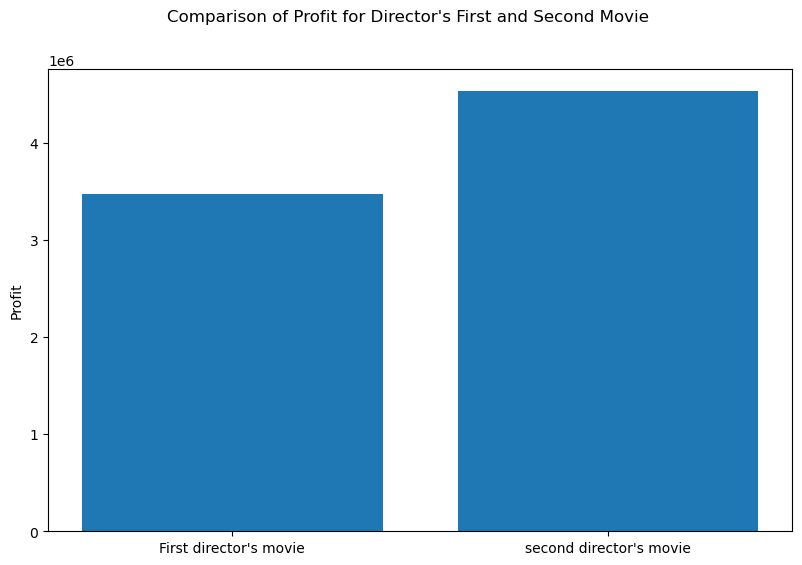

In [166]:
fig,ax=plt.subplots(nrows=1,ncols=1)
data={"First director's movie":find_mean(first),"second director's movie":find_mean(second)}
movie=data.keys()
means=data.values()
plt.bar(movie,means)

fig.suptitle("Comparison of Profit for Director's First and Second Movie")
ax.set_ylabel("Profit")
fig.set_figwidth(fig.get_figwidth()*1.5)
fig.set_figheight(fig.get_figheight()*1.25)

In [167]:
f=[]
s=[]
for profit in first.values():
    f.append(profit)
for profit in second.values():
    s.append(profit)
dbar,_,p_value=bootstrap_diff_means(f,s)
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
if p_value>0.05:
    print("Therefore there is not enough evidence to reject the null hypothesis that the mean of first and second movies produced are the same at the 5% significance level.")

There is a probability of 0.6813 that the observed difference of mean being different to -1054700.5051 given the underlying difference of means is 0
Therefore there is not enough evidence to reject the null hypothesis that the mean of first and second movies produced are the same at the 5% significance level.


In [168]:
_, p_value = ks_2samp(f,s)
print(f"The p value using Kolmogorov Smirnoff is {p_value}")

The p value using Kolmogorov Smirnoff is 0.7786838716395651


In [169]:
year_df=movies_df.sort_values("title_year",ascending=True).reset_index(drop=True)
directors=[]
profits=[]
for i,r in year_df.iterrows():
    directors.append(r.director_name)
    profits.append(r.profit)

In [170]:
first_all={}
second_all={}
third_all={}
fourth_all={}
count=0
for d in directors:
    if d in first_all.keys():
        if d in second_all.keys():
            if d in third_all.keys():
                fourth_all[d]=profits[count]
            else:
                third_all[d]=profits[count]
        else:
            second_all[d]=profits[count]
    else:
        first_all[d]=profits[count]
    count+=1

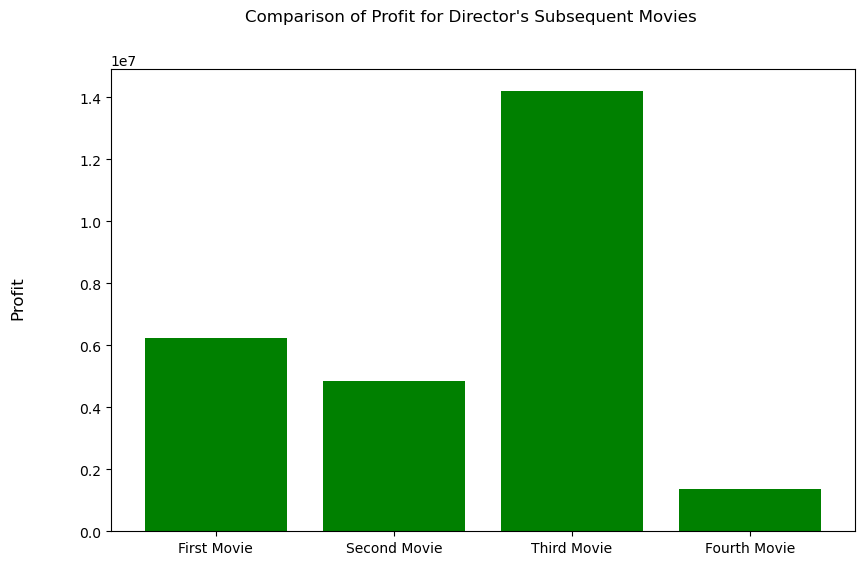

In [171]:
fig,axes=plt.subplots(nrows=1,ncols=1)
data={'First Movie':find_mean(first_all),'Second Movie':find_mean(second_all),'Third Movie':find_mean(third_all),'Fourth Movie':find_mean(fourth_all)}
movie=data.keys()
means=data.values()
plt.bar(movie,means,color="g")

fig.suptitle("Comparison of Profit for Director's Subsequent Movies")
fig.supylabel("Profit")
fig.set_figwidth(fig.get_figwidth()*1.5)
fig.set_figheight(fig.get_figheight()*1.25)

In [172]:
a=[]
t=[]
for profit in third_all.values():
    t.append(profit)
for profit in second_all.values():
    a.append(profit)
for profit in first_all.values():
    a.append(profit)
for profit in fourth_all.values():
    a.append(profit)
dbar,_,p_value=bootstrap_diff_means(t,a)
print(f"There is a probability of {p_value:.4f} that the observed difference of mean being different to {dbar:.4f} given the underlying difference of means is 0")
print("Therefore enough evidence to reject the null hypothesis that the 3rd movie is as profitable as other movies at the 5% significance level")

There is a probability of 0.0198 that the observed difference of mean being different to 8821093.9870 given the underlying difference of means is 0
Therefore enough evidence to reject the null hypothesis that the 3rd movie is as profitable as other movies at the 5% significance level


In [173]:
for d in htm_df.director_name:
    for d2,profit in second.items():
        if d==d2:
            print(d)
            print(profit)

John Carpenter
20378000.0
John Carpenter
20378000.0
Ti West
-672499.0
Ti West
-672499.0
Jamie Babbit
-518814.0
Greg Harrison
41309.0


In [174]:
ddf=movies_df[movies_df.director_name=="John Carpenter"]
ddf##produced many films since and would likely be out of budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
949,Color,John Carpenter,104.0,101.0,0.0,764.0,Valeria Golino,12000.0,25407250.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,R,50000000.0,1996.0,898.0,5.7,2.35,0,-24592750.0
1220,Color,John Carpenter,40.0,99.0,0.0,402.0,Michael McKean,782.0,14358033.0,Comedy|Romance|Sci-Fi|Thriller,...,English,USA,PG-13,40000000.0,1992.0,658.0,5.9,2.35,630,-25641967.0
1274,Color,John Carpenter,297.0,109.0,0.0,145.0,Richard Masur,957.0,13782838.0,Horror|Mystery|Sci-Fi,...,English,USA,R,15000000.0,1982.0,163.0,8.2,2.35,23000,-1217162.0
1657,Color,John Carpenter,156.0,98.0,0.0,900.0,Clea DuVall,26000.0,8434601.0,Action|Horror|Sci-Fi,...,English,USA,R,28000000.0,2001.0,1000.0,4.9,2.35,0,-19565399.0
1824,Color,John Carpenter,180.0,99.0,0.0,52.0,Kate Burton,400.0,11100000.0,Action|Adventure|Comedy|Fantasy,...,English,USA,PG-13,25000000.0,1986.0,223.0,7.3,2.35,19000,-13900000.0
2049,Color,John Carpenter,114.0,104.0,0.0,877.0,Cary-Hiroyuki Tagawa,2000.0,20241395.0,Action|Horror|Thriller,...,English,USA,R,20000000.0,1998.0,1000.0,6.1,2.35,0,241395.0
2196,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21378000.0,Fantasy|Horror,...,English,USA,R,1000000.0,1980.0,826.0,6.8,2.35,7000,20378000.0
2251,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,46700000.0
3087,Color,John Carpenter,201.0,106.0,0.0,381.0,Adrienne Barbeau,742.0,25244700.0,Action|Sci-Fi,...,English,UK,R,6000000.0,1981.0,602.0,7.2,2.35,0,19244700.0
3268,Color,John Carpenter,172.0,93.0,0.0,133.0,Peter Jason,355.0,13008928.0,Horror|Sci-Fi|Thriller,...,English,USA,R,4000000.0,1988.0,151.0,7.3,2.35,27000,9008928.0


In [175]:
ddf=movies_df[movies_df.director_name=="Greg Harrison"]
ddf##both films in budget and profitable

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
3666,Color,Greg Harrison,46.0,86.0,7.0,17.0,Ari Gold,328.0,1114943.0,Drama|Music,...,English,USA,R,500000.0,2000.0,27.0,6.5,1.85,0,614943.0
3729,Color,Greg Harrison,43.0,78.0,7.0,142.0,Anne Archer,308.0,191309.0,Drama|Mystery|Thriller,...,English,USA,R,150000.0,2004.0,249.0,5.5,1.85,98,41309.0


In [176]:
ddf=movies_df[movies_df.director_name=="Ti West"]
ddf##both films made a loss

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
3608,Color,Ti West,238.0,95.0,243.0,725.0,Greta Gerwig,969.0,100659.0,Horror,...,English,USA,R,900000.0,2009.0,962.0,6.4,1.85,0,-799341.0
3640,Color,Ti West,292.0,101.0,243.0,74.0,Jake Ryan,969.0,77501.0,Horror,...,English,USA,R,750000.0,2011.0,128.0,5.5,2.35,0,-672499.0


In [177]:
ddf=movies_df[movies_df.director_name=="Jamie Babbit"]
ddf##Last film made a big loss and only fits the thriller aspect of the genre

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
3552,Color,Jamie Babbit,99.0,85.0,91.0,849.0,Clea DuVall,1000.0,2199853.0,Comedy|Drama,...,English,USA,R,1200000.0,1999.0,1000.0,6.6,1.85,0,999853.0
3621,Color,Jamie Babbit,65.0,91.0,91.0,659.0,David Gallagher,982.0,381186.0,Drama|Thriller,...,English,USA,R,900000.0,2005.0,796.0,6.4,2.35,698,-518814.0


In [178]:
kw_df=htm_df.groupby(["plot_keywords"])["profit"].mean()
topkw=kw_df.sort_values(ascending=False)
topkw.head(10)##some keywords that were successful

plot_keywords
chained|flashback|killer|serial killer|surprise ending                                                 53953403.0
critically bashed|demonic possession|exorcism|exorcist|found footage                                   52245055.0
halloween|masked killer|michael myers|slasher|trick or treat                                           46700000.0
money|motel|rain|shower|theft                                                                          31193053.0
cannibal|chainsaw|hitchhiker|independent film|leatherface                                              30775468.0
blender|computer screen|secret|skype|webcam                                                            30537320.0
bare chested male|female full frontal nudity|hairy chest|male full frontal nudity|nude with glasses    30000882.0
breaking and entering|gallows|hanging|high school|stage                                                22657819.0
california|fog|leper|lighthouse|ship                                      

Finally, I could compare all other correlations, using Spearman’s rank, for continuous data in heatmaps. For all movies this only showed moderate correlation with gross which would be common sense. In my selected possible movies, there was also in the number of reviews from users. I believe this is an interesting point as it shows that the quality of the film does not necessarily correlate with higher profit or with critic’s reviews but does if the film produces some buzz for people to comment on it.

In [179]:
movies_df2=movies_df.drop(["color","director_name","actor_2_name","genres","actor_1_name","movie_title","actor_3_name","plot_keywords","movie_imdb_link","language","country","content_rating"],axis=1)

Negligible correlation: profit and num_critic_for_reviews
Negligible correlation: profit and duration
Negligible correlation: profit and director_facebook_likes
Negligible correlation: profit and actor_3_facebook_likes
Negligible correlation: profit and actor_1_facebook_likes
Moderate correlation: profit and gross
Low correlation: profit and num_voted_users
Negligible correlation: profit and cast_total_facebook_likes
Negligible correlation: profit and facenumber_in_poster
Negligible correlation: profit and num_user_for_reviews
Negligible correlation: profit and budget
Negligible correlation: profit and title_year
Negligible correlation: profit and actor_2_facebook_likes
Negligible correlation: profit and imdb_score
Negligible correlation: profit and aspect_ratio
Negligible correlation: profit and movie_facebook_likes


<Axes: >

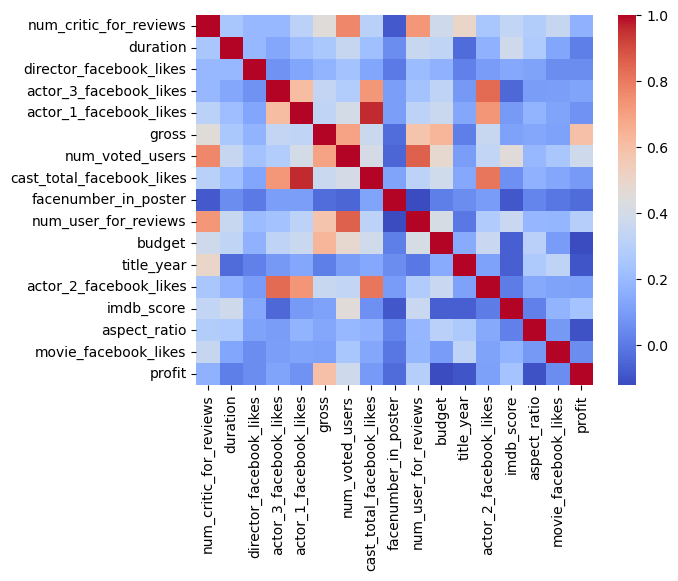

In [180]:
corr = movies_df2.corr(method="spearman")
cols = movies_df2.columns

col1 = "profit"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")

sns.heatmap(data=corr, cmap="coolwarm")##For all movies there isnt much correlation with profit apart from gross which makes sense

In [181]:
movies_df3=htm_df.drop(["color","director_name","actor_2_name","genres","actor_1_name","movie_title","actor_3_name","plot_keywords","movie_imdb_link","language","country","content_rating","Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Documentary","Fantasy","History","Horror","Music","Musical","Mystery","Romance","Sci-Fi","Short","Sport","Thriller","War","Western"],axis=1)

Low correlation: profit and num_critic_for_reviews
Negligible correlation: profit and duration
Negligible correlation: profit and director_facebook_likes
Negligible correlation: profit and actor_3_facebook_likes
Negligible correlation: profit and actor_1_facebook_likes
High correlation: profit and gross
Low correlation: profit and num_voted_users
Negligible correlation: profit and cast_total_facebook_likes
Negligible correlation: profit and facenumber_in_poster
Moderate correlation: profit and num_user_for_reviews
Negligible correlation: profit and budget
Low correlation: profit and title_year
Negligible correlation: profit and actor_2_facebook_likes
Negligible correlation: profit and imdb_score
Negligible correlation: profit and aspect_ratio
Negligible correlation: profit and movie_facebook_likes


<Axes: >

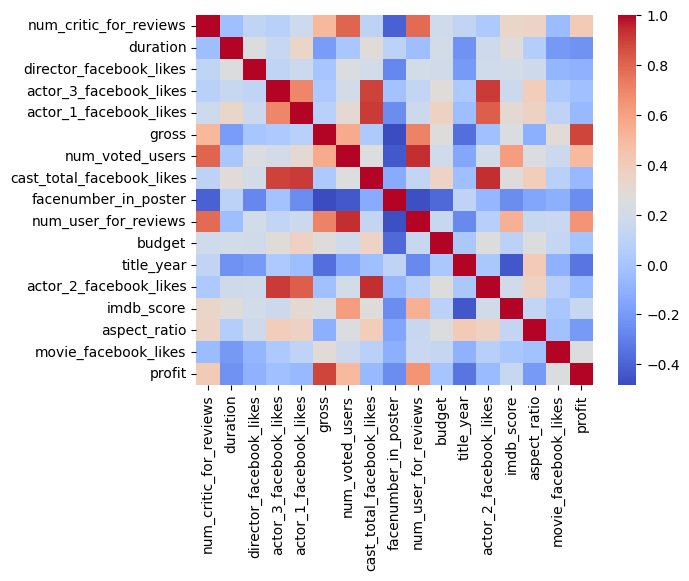

In [182]:
corr = movies_df3.corr(method="spearman")
cols = movies_df3.columns

col1 = "profit"
for col2 in cols[:-1]:
    correlation = corr[col1][col2]
    if np.abs(correlation) < 0.3:
        print(f"Negligible correlation: {col1} and {col2}")
    if 0.3 <= np.abs(correlation) < 0.5:
        print(f"Low correlation: {col1} and {col2}")
    if 0.5 <= np.abs(correlation) < 0.7:
        print(f"Moderate correlation: {col1} and {col2}")
    if 0.7 <= np.abs(correlation) < 0.9:
        print(f"High correlation: {col1} and {col2}")
    if 0.9 <= np.abs(correlation):
        print(f"Very high correlation: {col1} and {col2}")

sns.heatmap(data=corr, cmap="coolwarm")

Overall, from this data there were no normal distributions so for each datapoint I had to bootstrap in order to find significant data. From the significant data found, I could say that the film should be produced in the USA in English. Also, the genre should include at least one of horror, thriller and mystery. There would be a tentative suggestion of the director being Greg Harrison. The movie should also find a way to make people talk about it in which case a marketing department would be very useful. 

In [4]:
filepath="DSRM Report 1 277154-2.ipynb"

In [5]:
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 1000
